In [3]:
import numpy as np 
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Import Datasets

In [4]:
resumes = pd.read_csv('data/Resume1.csv')
resumes.head()

,Job category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


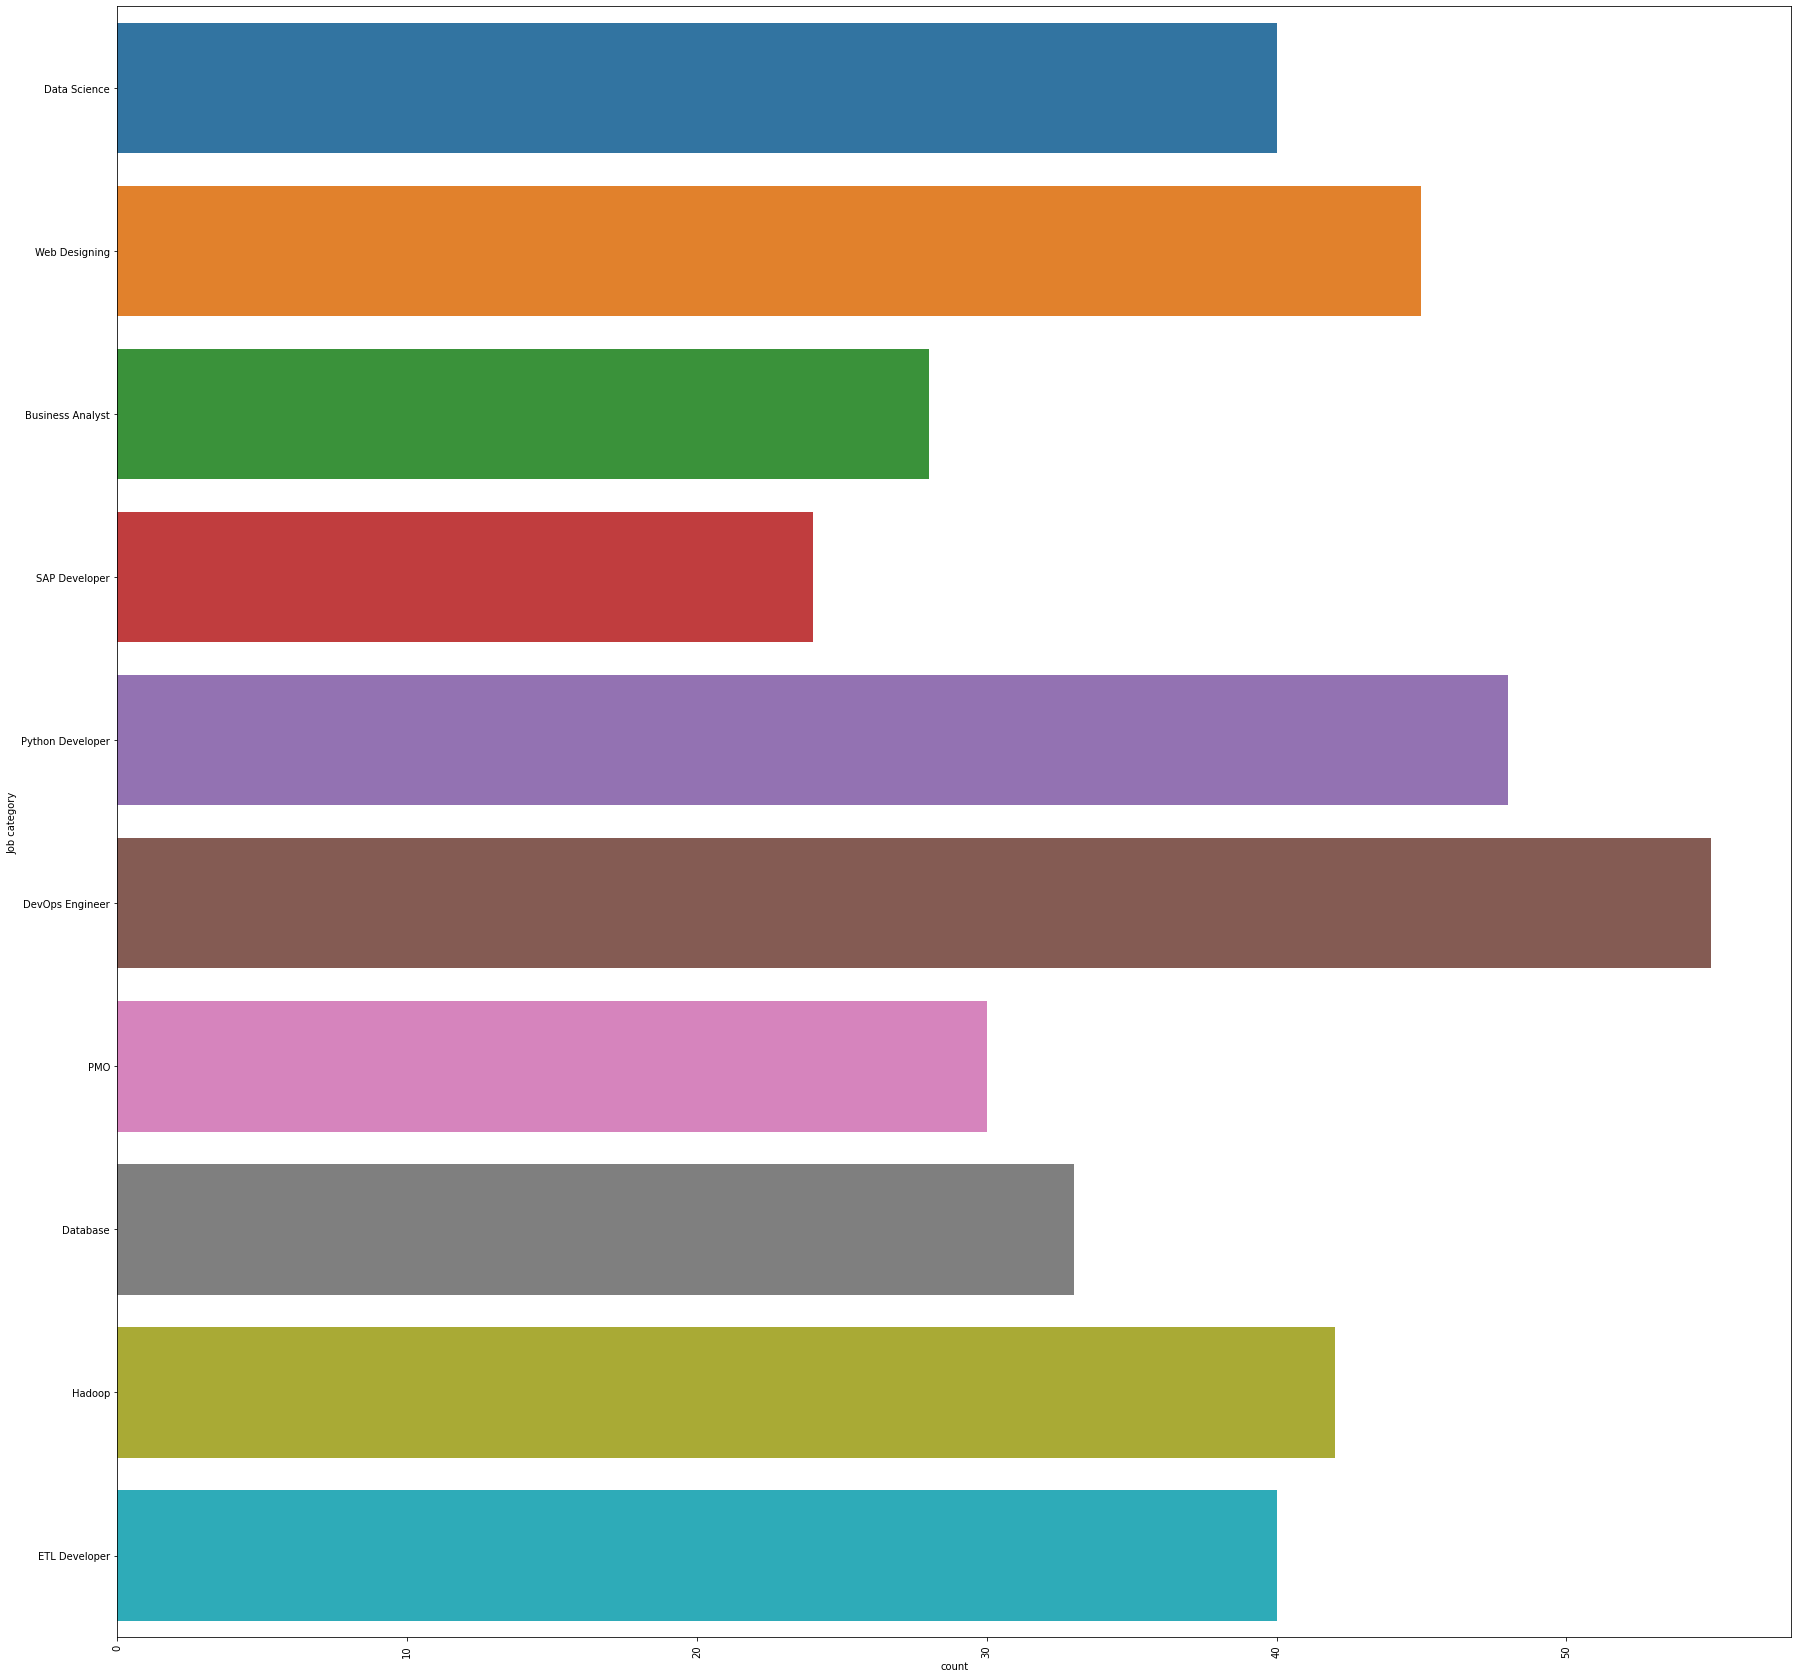

In [5]:
plt.figure(figsize=(30,30))
plt.xticks(rotation=90)
sns.countplot(y="Job category", data=resumes)

In [7]:
resumes2 = pd.read_csv('data/Resume2.csv')
resumes2.head()

,Job category,Resume
0,Data or business analyst;Data scientist or mac...,Skills 6-8 yearsNANANANA
1,Data or business analyst;Data scientist or mac...,Skills 3-5 yearsNANANANA
2,Data or business analyst;Data scientist or mac...,Skills 3-5 yearsNANANANA
3,Data or business analyst;Data scientist or mac...,Skills 3-5 yearsNANANANA
4,Data or business analyst;Data scientist or mac...,Skills 12-14 yearsC#;JavaScript;Python;Ruby;SQ...


In [8]:
#resumes2 = resumes2.drop(resumes2.columns[[ 2:29]], axis=1)

The dataset is large, so I will select the top 30 categories with the most resumes and visualise it.

In [9]:
print ("Distinct categories of IT Resumes:")
print (resumes2['Job category'].value_counts().head(30))
#dataview = print (resumes2['Category'].value_counts().head(30))
#dataview = resumes2['Category'].value_counts()[:n].idxmax()
#dataview


Distinct categories of IT Resumes:
Data or business analyst;Data scientist or machine learning specialist                                                                        448
Data or business analyst;Data scientist or machine learning specialist;Student                                                                 92
Data or business analyst;Data scientist or machine learning specialist;Database administrator                                                  59
Data or business analyst;Data scientist or machine learning specialist;Educator or academic researcher                                         53
Data or business analyst;Data scientist or machine learning specialist;Full-stack developer                                                    30
Data or business analyst;Data scientist or machine learning specialist;Educator or academic researcher;Student                                 25
Data or business analyst;Data scientist or machine learning specialist;Front-end develope

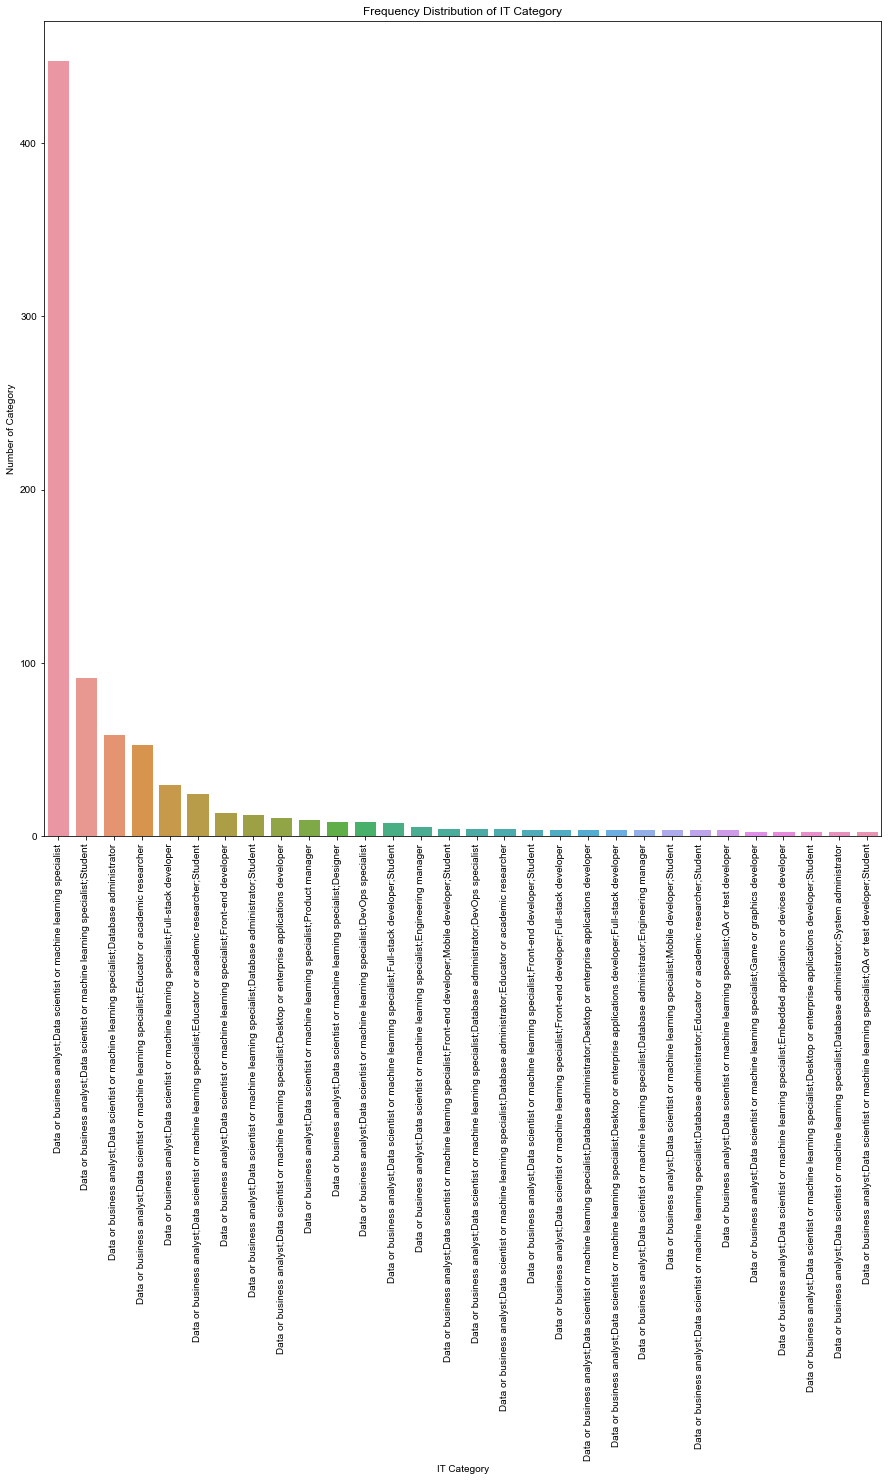

In [10]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#select max 30 columns for graphing because the dataset is too large to graph at once
resumes_count = resumes2['Job category'].value_counts().head(30)
plt.figure(figsize=(15, 15))
plt.xticks(rotation=90)
sns.set(style="darkgrid")
sns.barplot(resumes_count.index, resumes_count.values, alpha=1.0)
plt.title('Frequency Distribution of IT Category')
plt.ylabel('Number of Category') #fontsize=12)
plt.xlabel('IT Category') #fontsize=12)
plt.show()

In [11]:
dataset= pd.concat([resumes, resumes2], axis=0)
dataset.tail()

,Job category,Resume
1031,Data or business analyst;Data scientist or mac...,Skills 6-8 yearsC#;CoffeeScript;JavaScript;SQL...
1032,Data or business analyst;Data scientist or mac...,Skills 6-8 yearsJava;SQL;Bash/ShellMySQL;SQLit...
1033,Data or business analyst;Data scientist or mac...,Skills 12-14 yearsRuby;Swift;HTML;CSS;Bash/She...
1034,Data or business analyst;Data scientist or mac...,Skills 27-29 yearsC;C++;Python;Bash/ShellNALin...
1035,Data or business analyst;Data scientist or mac...,Skills 0-2 yearsNANANANA


In [16]:
len(dataset)

1739

In [12]:
print ("Distinct categories of IT Resumes:")
print (dataset['Job category'].unique())

Distinct categories of IT Resumes:
['Data Science' 'Web Designing' nan 'Business Analyst' 'SAP Developer'
 'Python Developer' 'DevOps Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer'
 'Data or business analyst;Data scientist or machine learning specialist;System administrator'
 'Data or business analyst;Data scientist or machine learning specialist;Student;System administrator'
 'Data or business analyst;Data scientist or machine learning specialist;Student'
 'Data or business analyst;Data scientist or machine learning specialist;QA or test developer;Student;System administrator'
 'Data or business analyst;Data scientist or machine learning specialist;QA or test developer;Student'
 'Data or business analyst;Data scientist or machine learning specialist;QA or test developer'
 'Data or business analyst;Data scientist or machine learning specialist;Product manager'
 'Data or business analyst;Data scientist or machine learning specialist;Mobile developer;System administrator'
 'Data or

In [13]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category -")
print (dataset['Job category'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category -
Data or business analyst;Data scientist or machine learning specialist                                                                                                                                                                        448
Data or business analyst;Data scientist or machine learning specialist;Student                                                                                                                                                                 92
Data or business analyst;Data scientist or machine learning specialist;Database administrator                                                                                                                                                  59
DevOps Engineer                                                                                                                                                               

In [14]:
dataset['Resume']=dataset['Resume'].str.lower()
print(dataset['Resume'])

0       skills * programming languages: python (pandas...
1       education details \r\nmay 2013 to may 2017 b.e...
2       areas of interest deep learning, control syste...
3       skills â¢ r â¢ python â¢ sap hana â¢ table...
4       education details \r\n mca   ymcaust,  faridab...
                              ...                        
1031    skills 6-8 yearsc#;coffeescript;javascript;sql...
1032    skills 6-8 yearsjava;sql;bash/shellmysql;sqlit...
1033    skills 12-14 yearsruby;swift;html;css;bash/she...
1034    skills 27-29 yearsc;c++;python;bash/shellnalin...
1035                             skills 0-2 yearsnananana
Name: Resume, Length: 1739, dtype: object


In [13]:
dataset.head()

,Job category,Resume
0,Data Science,skills * programming languages: python (pandas...
1,Data Science,education details \r\nmay 2013 to may 2017 b.e...
2,Data Science,"areas of interest deep learning, control syste..."
3,Data Science,skills â¢ r â¢ python â¢ sap hana â¢ table...
4,Data Science,"education details \r\n mca ymcaust, faridab..."


In [14]:
dataset['Resume']=dataset['Resume'].str.lower()
print(dataset['Resume'])

0       skills * programming languages: python (pandas...
1       education details \r\nmay 2013 to may 2017 b.e...
2       areas of interest deep learning, control syste...
3       skills â¢ r â¢ python â¢ sap hana â¢ table...
4       education details \r\n mca   ymcaust,  faridab...
                              ...                        
1031    skills 6-8 yearsc#;coffeescript;javascript;sql...
1032    skills 6-8 yearsjava;sql;bash/shellmysql;sqlit...
1033    skills 12-14 yearsruby;swift;html;css;bash/she...
1034    skills 27-29 yearsc;c++;python;bash/shellnalin...
1035                             skills 0-2 yearsnananana
Name: Resume, Length: 1739, dtype: object


In [15]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', str(resumeText))  # remove URLs
    resumeText = re.sub('RT|cc', ' ', str(resumeText))  # remove RT and cc
    resumeText = re.sub('#\S+', '', str(resumeText))  # remove hashtags
    resumeText = re.sub('@\S+', '  ', str(resumeText))  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', str(resumeText))  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', str(resumeText)) 
    resumeText = re.sub('nananana', ' ', str(resumeText))  # NANANA
    resumeText = re.sub('\s+', ' ', str(resumeText))  # remove extra whitespace
    return resumeText

In [16]:
dataset['cleaned_resume'] = dataset['Resume'].apply(lambda x: cleanResume(x))
print (dataset['cleaned_resume'][31])

31    education details may 2013 to may 2017 b e uit...
31    skills 27 29 yearsjava javascript sql vba vb n...
Name: cleaned_resume, dtype: object


In [17]:
dataset.head()

,Job category,Resume,cleaned_resume
0,Data Science,skills * programming languages: python (pandas...,skills programming languages python pandas num...
1,Data Science,education details \r\nmay 2013 to may 2017 b.e...,education details may 2013 to may 2017 b e uit...
2,Data Science,"areas of interest deep learning, control syste...",areas of interest deep learning control system...
3,Data Science,skills â¢ r â¢ python â¢ sap hana â¢ table...,skills r python sap hana tableau sap hana sql ...
4,Data Science,"education details \r\n mca ymcaust, faridab...",education details mca ymcaust faridabad haryan...


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bechi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bechi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('exprience', 507), ('project', 496), ('data', 462), ('months', 452), ('description', 396), ('details', 341), ('1', 337), ('company', 317), ('application', 289), ('web', 238), ('year', 237), ('business', 216), ('learning', 204), ('less', 204), ('used', 192), ('software', 190), ('team', 183), ('developed', 182), ('technologies', 177), ('python', 176), ('science', 170), ('bootstrap', 166), ('machine', 156), ('maharashtra', 152), ('jquery', 151), ('sql', 149), ('designed', 144), ('system', 143), ('analysis', 141), ('requirement', 140), ('database', 139), ('user', 137), ('roles', 134), ('6', 132), ('based', 132), ('using', 130), ('development', 128), ('time', 127), ('responsibility', 126), ('website', 126), ('january', 125), ('information', 123), ('analytics', 120), ('ui', 120), ('developer', 116), ('24', 111), ('like', 111), ('skills', 109), ('javascript', 109), ('test', 109)]


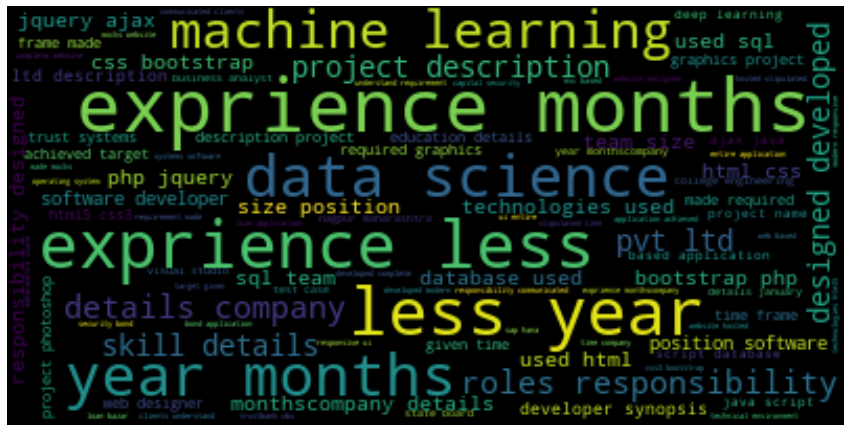

In [105]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
  

import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = dataset['cleaned_resume'].values
cleanedSentences = ""
for i in range(0,160):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [106]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Job category']
le = LabelEncoder()
for i in var_mod:
    dataset[i] = le.fit_transform(dataset[i].astype(str))
print ("CONVERTED THE CATEGORICAL VARIABLES INTO NUMERICALS")

CONVERTED THE CATEGORICAL VARIABLES INTO NUMERICALS


In [109]:
#from sklearn.model_selection import train_test_split
#from sklearn.feature_extraction.text import TfidfVectorizer
#from scipy.sparse import hstack


#tfidf = TfidfVectorizer(sublinear_tf= True, #use a logarithmic form for frequency
 #                      min_df = 5, #minimum numbers of documents a word must be present in to be kept
  #                     norm= 'l2', #ensure all our feature vectors have a euclidian norm of 1
   #                    ngram_range= (1,2), #to indicate that we want to consider both unigrams and bigrams.
    #                   stop_words ='english')
#features = tfidf.fit_transform(dataset['cleaned_resume']).toarray()

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

features = dataset['cleaned_resume'].values
labels = dataset['Job category'].values
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(features)
ft = word_vectorizer.transform(features)

print ("Feature completed .....")


X_train,X_test,y_train,y_test =  train_test_split(ft,labels,random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

Feature completed .....
(1304, 1500)
(1304,)
(435, 1500)
(435,)


In [109]:
from sklearn import svm
from sklearn.metrics import average_precision_score
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)


0.671264367816092

In [133]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, prediction, average='micro')
print('Precision: %.3f' % precision)

Precision: 0.651


In [134]:
from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, prediction, average='micro'))

Recall Score :  0.6505747126436782


In [112]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf,ft,labels, cv=10)
scores
#print('Average precision-recall score: {0:0.2f}'.format(clf.average_precision_score(y_test, prediction)))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


array([0.65517241, 0.66666667, 0.66666667, 0.66091954, 0.66091954,
       0.66091954, 0.66091954, 0.66091954, 0.66091954, 0.65895954])

In [75]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [125]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, prediction))

Accuracy of KNeighbors Classifier on training set: 0.66
Accuracy of KNeighbors Classifier on test set: 0.60

 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.94      1.00      0.97        15
           2       0.45      0.75      0.56       111
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         1
          31       0.00      0.00      0.00         1
          34       0.00      0.00      0.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [122]:
precision = precision_score(y_test, prediction, average='micro')
print('Precision: %.3f' % precision)

Precision: 0.664


In [123]:
from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, prediction, average='micro'))

Recall Score :  0.664367816091954


In [90]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, prediction, average='micro')
print('Precision: %.3f' % precision)

In [118]:
from sklearn.metrics import average_precision_score
#average_precision = OneVsRestClassifier(average_precision_score())
#average_precision = average_precision(y_test, prediction)

#print('Average precision-recall score: {0:0.2f}'.format(
#      average_precision))
clf2 = OneVsRestClassifier(MultinomialNB()).fit(X_train, y_train)
prediction = clf2.predict(X_test)

print('Accuracy of MultinomialNB Classifier on training set: {:.2f}'.format(clf2.score(X_train, y_train)))
print('Accuracy of MultinomialNB Classifier on test set: {:.2f}'.format(clf2.score(X_test, y_test)))
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))
#print('Accuracy of MultinomialNB Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
#print('Accuracy of MultinomialNB Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))
#print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))

Accuracy of MultinomialNB Classifier on training set: 0.66
Accuracy of MultinomialNB Classifier on test set: 0.66

 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.80      0.89        15
           2       0.44      1.00      0.61       111
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         1
          31       0.00      0.00      0.00         1
          34       0.00      0.00  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [116]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, prediction, average='micro')
print('Precision: %.3f' % precision)

Precision: 0.600


In [121]:
from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, prediction, average='micro'))

Recall Score :  0.664367816091954


In [131]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#Fitting  Random Forest Classifier To The Training Set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy' ,random_state = 0)
classifier.fit(X_train,Y_train)


#Predicting The Test Set Results
y_pred = classifier.predict(X_test)
classifier.score(X_test, y_test)

ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.

In [130]:
#from sklearn.ensemble import RandomForestClassifier
#rfclf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
#prediction = rfclf.predict(X_test)
#rfclf.score(X_train, y_train)
#rfclf.score (y_test, prediction)